# 数据聚合和分组运算
- 利用Python进行数据分析 第九章

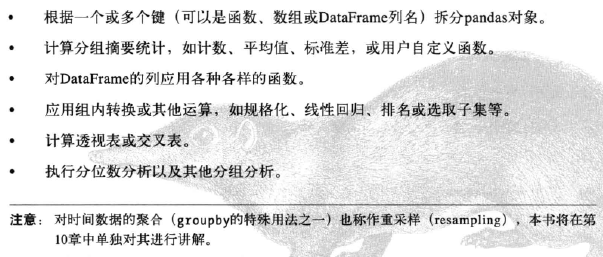

In [3]:
Image(filename="picture\Data Aggregation and Group Operations.png")

In [1]:
from pandas import DataFrame,Series
import pandas as pd

import numpy as np
from IPython.display import Image

import re

## 一、GroupBy 技术

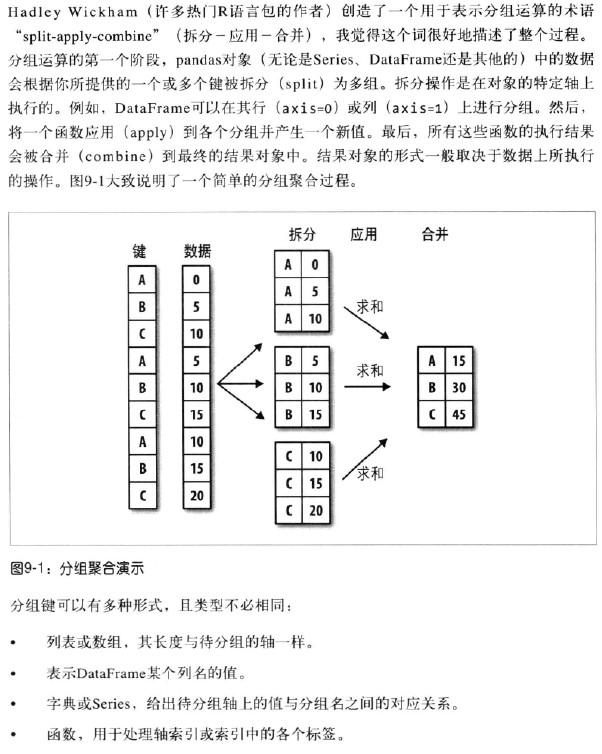

In [4]:
Image(filename="picture\GroupBy Mechanics.png")

In [4]:
df = DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],'key2' : ['one', 'two', 'one', 'two', 'one'],
  'data1' : np.random.randn(5),'data2' : np.random.randn(5)})

print df
print 
grouped = df['data1'].groupby(df['key1']) # 按key1 进行分组，并计算data1 列的平均值

print grouped
print 
print grouped.mean()
print 
means = df['data1'].groupby([df['key1'], df['key2']]).mean() # 一次传入多个数组
print means
print means.unstack()

      data1     data2 key1 key2
0  2.179813  0.788100    a  one
1  1.201084 -0.617797    a  two
2  0.327193 -2.200166    b  one
3 -0.539152 -0.473590    b  two
4 -0.943130 -1.773277    a  one


key1
a    0.812589
b   -0.105980
Name: data1, dtype: float64

key1  key2
a     one     0.618342
      two     1.201084
b     one     0.327193
      two    -0.539152
Name: data1, dtype: float64
key2       one       two
key1                    
a     0.618342  1.201084
b     0.327193 -0.539152


In [9]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
print df['data1'].groupby([states, years]).mean()  # 分组键除了series之外，还有任何长度适当的数组
print df.groupby('key1').mean()

print df.groupby(['key1', 'key2']).mean() # 列名（字符串、数字或其他Python对象）也可以作为分组键

California  2005   -0.835644
            2006   -0.398173
Ohio        2005    0.310546
            2006   -0.263047
Name: data1, dtype: float64
         data1     data2
key1                    
a    -0.416563  0.989780
b     0.186959  1.346017
              data1     data2
key1 key2                    
a    one  -0.207023  0.449001
     two  -0.835644  2.071338
b    one  -0.398173  1.553641
     two   0.772092  1.138392


In [8]:
print df.groupby(['key1', 'key2']).size() # 返回一个含有分组大小的Series

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64


### 1 对分组进行迭代

In [10]:
for name, group in df.groupby('key1'): # 产生一个二元元组（由分组名和数据块组成）
    print name
    print group

a
      data1     data2 key1 key2
0 -0.150999  0.767377    a  one
1 -0.835644  2.071338    a  two
4 -0.263047  0.130625    a  one
b
      data1     data2 key1 key2
2 -0.398173  1.553641    b  one
3  0.772092  1.138392    b  two


In [12]:
for (k1, k2), group in df.groupby(['key1', 'key2']): # 多重键时，元组的第一个元素是由键值组成的元组
    print k1, k2
    print group

a one
      data1     data2 key1 key2
0 -0.150999  0.767377    a  one
4 -0.263047  0.130625    a  one
a two
      data1     data2 key1 key2
1 -0.835644  2.071338    a  two
b one
      data1     data2 key1 key2
2 -0.398173  1.553641    b  one
b two
      data1     data2 key1 key2
3  0.772092  1.138392    b  two


In [15]:
pieces = dict(list(df.groupby('key1')))

print pieces
print pieces['b'] # 对数据片段的操作
print df.dtypes

{'a':       data1     data2 key1 key2
0 -0.150999  0.767377    a  one
1 -0.835644  2.071338    a  two
4 -0.263047  0.130625    a  one, 'b':       data1     data2 key1 key2
2 -0.398173  1.553641    b  one
3  0.772092  1.138392    b  two}
      data1     data2 key1 key2
2 -0.398173  1.553641    b  one
3  0.772092  1.138392    b  two
data1    float64
data2    float64
key1      object
key2      object
dtype: object


In [14]:
grouped = df.groupby(df.dtypes, axis=1) # 默认是 axis = 0

print grouped
print dict(list(grouped))

{dtype('O'):   key1 key2
0    a  one
1    a  two
2    b  one
3    b  two
4    a  one, dtype('float64'):       data1     data2
0 -0.150999  0.767377
1 -0.835644  2.071338
2 -0.398173  1.553641
3  0.772092  1.138392
4 -0.263047  0.130625}


### 2 选取一个或一组列

In [16]:
print df.groupby('key1')['data1']
print df.groupby('key1')[['data2']]

In [17]:
print df['data1'].groupby(df['key1'])
print df[['data2']].groupby(df['key1'])

In [94]:
print df.groupby(['key1', 'key2'])[['data2']].mean() # 只计算data2列数据，并以DataFrame形式得到结果

s_grouped = df.groupby(['key1', 'key2'])['data2']

print s_grouped
s_grouped.mean()

              data2
key1 key2          
a    one   0.449001
     two   2.071338
b    one   1.553641
     two   1.138392


key1  key2
a     one     0.449001
      two     2.071338
b     one     1.553641
      two     1.138392
Name: data2, dtype: float64

### 3 通过字典或Series进行分组

In [93]:
people = DataFrame(np.random.randn(5, 5),columns=['a', 'b', 'c', 'd', 'e'],
 index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])

print people

people.ix[2:3, ['b', 'c']] = np.nan # Add a few NA values
print 
print people

mapping = {'a': 'red', 'b': 'red', 'c': 'blue','d': 'blue', 'e': 'red', 'f' : 'orange'}
mapping

               a         b         c         d         e
Joe     0.475399  0.403276 -1.087455  0.596448  0.942394
Steve   0.109674 -0.747144  0.984319  0.968863  1.656754
Wes     0.050640 -0.031254 -0.951074 -1.311991  0.650527
Jim     0.923728 -1.041985  0.428581  1.243862 -0.138348
Travis -0.135706  0.418531  0.973229  1.098708  0.061967

               a         b         c         d         e
Joe     0.475399  0.403276 -1.087455  0.596448  0.942394
Steve   0.109674 -0.747144  0.984319  0.968863  1.656754
Wes     0.050640       NaN       NaN -1.311991  0.650527
Jim     0.923728 -1.041985  0.428581  1.243862 -0.138348
Travis -0.135706  0.418531  0.973229  1.098708  0.061967


{'a': 'red', 'b': 'red', 'c': 'blue', 'd': 'blue', 'e': 'red', 'f': 'orange'}

In [92]:
by_column = people.groupby(mapping, axis=1)

print by_column
print by_column.sum()

map_series = Series(mapping)
people.groupby(map_series, axis=1).count()

            blue       red
Joe     0.879595  2.163068
Steve   1.296097 -0.162462
Wes    -1.348553 -1.626573
Jim    -0.981987 -2.535688
Travis -2.037511 -0.495118


,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


### 4 通过函数进行分组

In [91]:
print people.groupby(len).sum()

key_list = ['one', 'one', 'one', 'two', 'two']
people.groupby([len, key_list]).min()

          a         b         c         d         e
3 -2.209436  0.452562  0.744759 -2.195705 -0.242320
5 -0.895872  0.354999  0.926228  0.369869  0.378411
6 -1.848603  0.995470 -0.869608 -1.167903  0.358014


a         b         c         d         e
3 one -1.604034  0.995408  0.783069 -1.348553 -0.022539
  two -0.265971 -0.542846 -0.038310 -0.943677 -1.726870
5 one -0.895872  0.354999  0.926228  0.369869  0.378411
6 two -1.848603  0.995470 -0.869608 -1.167903  0.358014

### 5 根据索引级别分组

In [90]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],[1, 3, 5, 1, 3]], names=['cty', 'tenor'])
hier_df = DataFrame(np.random.randn(4, 5), columns=columns)
print columns
print hier_df
hier_df.groupby(level='cty', axis=1).count()

MultiIndex(levels=[[u'JP', u'US'], [1, 3, 5]],
           labels=[[1, 1, 1, 0, 0], [0, 1, 2, 0, 1]],
           names=[u'cty', u'tenor'])
cty          US                            JP          
tenor         1         3         5         1         3
0      0.247871 -1.707298 -0.407104 -0.148301  0.950252
1      0.244713  0.606718  2.242855  0.701460  1.439456
2     -0.904444 -1.502830  1.282569 -1.120275  0.801155
3      1.866324  0.306256 -0.597416  1.288203  0.430471


cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3
